In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, validation_curve,KFold,cross_val_score
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,RidgeCV,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

In [2]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [3]:
oscars_df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
oscars_df.head()

,IMDBId,movie title,language,country,runtime (mins),mpaarating,metacritic score,budget,distributionCompany,Awards,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Peter Morgan,Writer_Quentin Tarantino,Writer_Steven Zaillian,Writer_Woody Allen
0,tt0091763,Platoon,English,USA,120,R,92.0,6.000000e+06,Orion Pictures,Best Actor in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0082979,Reds,English,USA,195,PG,76.0,3.200000e+07,Paramount Pictures,Best Actor in a Leading Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0084434,An Officer and a Gentleman,English,USA,124,R,75.0,7.500000e+06,Paramount Pictures,Best Actor in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0119360,In & Out,English,USA,90,PG-13,70.0,3.500000e+07,Paramount Pictures,Best Actress in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0292542,Son of the Bride,Spanish,Argentina,123,R,68.0,1.193676e+07,Sony Pictures Classics,Best Foreign Language Film,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(oscars_df.select_dtypes(include=numerics).columns)
oscars_data = oscars_df[numerical_vars]
oscars_data.shape

(1136, 88)

In [6]:
oscars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 88 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   runtime (mins)                            1136 non-null   int64  
 1   metacritic score                          1136 non-null   float64
 2   budget                                    1072 non-null   float64
 3   Awards_Best Actor in a Leading Role       479 non-null    float64
 4   Awards_Best Actor in a Supporting Role    479 non-null    float64
 5   Awards_Best Actress in a Leading Role     479 non-null    float64
 6   Awards_Best Art Direction-Set Decoration  479 non-null    float64
 7   Awards_Best Cinematography                479 non-null    float64
 8   Awards_Best Director                      479 non-null    float64
 9   Awards_Best Film Editing                  479 non-null    float64
 10  Awards_Best Motion Picture of the Ye

In [7]:
oscars_data['budget'].fillna(oscars_data['budget'].mean(),inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
oscars_data.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
oscars_data

,runtime (mins),metacritic score,budget,Awards_Best Actor in a Leading Role,Awards_Best Actor in a Supporting Role,Awards_Best Actress in a Leading Role,Awards_Best Art Direction-Set Decoration,Awards_Best Cinematography,Awards_Best Director,Awards_Best Film Editing,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Peter Morgan,Writer_Quentin Tarantino,Writer_Steven Zaillian,Writer_Woody Allen
0,120,92.0,6.000000e+06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,195,76.0,3.200000e+07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,124,75.0,7.500000e+06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90,70.0,3.500000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123,68.0,1.193676e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,110,77.0,4.100000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1132,105,65.0,1.000000e+08,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,143,40.0,7.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1134,107,57.0,4.425875e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
oscars_final = oscars_data[['metacritic score','Director_Avg_Score','Awards_Best Art Direction-Set Decoration','Summer','Genre_Adventure',\
                         'Lead_Actor_Avg_Score','Awards_Best Motion Picture of the Year',\
                         'Avg_Rating_by_writer','runtime (mins)','budget','Awards_Best Director']]

In [54]:
oscars_final.corr()

,metacritic score,Director_Avg_Score,Awards_Best Art Direction-Set Decoration,Summer,Genre_Adventure,Lead_Actor_Avg_Score,Awards_Best Motion Picture of the Year,Avg_Rating_by_writer,runtime (mins),budget,Total_Noms,Awards_Best Director
metacritic score,1.000000,0.843538,-0.042860,0.009943,-0.088510,0.798651,0.255874,0.926287,-0.019315,-0.154606,0.327954,0.068001
Director_Avg_Score,0.843538,1.000000,-0.046333,-0.019483,-0.057011,0.730323,0.221718,0.845832,-0.029389,-0.111052,0.180483,0.046191
Awards_Best Art Direction-Set Decoration,-0.042860,-0.046333,1.000000,0.003427,0.050109,0.018658,-0.063352,-0.035395,0.086136,-0.020378,0.046992,-0.018959
Summer,0.009943,-0.019483,0.003427,1.000000,-0.024761,-0.030138,-0.064916,-0.014590,-0.081928,0.073144,-0.086312,-0.031861
Genre_Adventure,-0.088510,-0.057011,0.050109,-0.024761,1.000000,-0.083842,0.010335,-0.073819,0.104934,0.128022,0.029094,-0.027667
Lead_Actor_Avg_Score,0.798651,0.730323,0.018658,-0.030138,-0.083842,1.000000,0.188630,0.777251,-0.045243,-0.110246,0.205334,0.055104
Awards_Best Motion Picture of the Year,0.255874,0.221718,-0.063352,-0.064916,0.010335,0.188630,1.000000,0.212215,0.102197,0.002108,0.468844,-0.035675
Avg_Rating_by_writer,0.926287,0.845832,-0.035395,-0.014590,-0.073819,0.777251,0.212215,1.000000,-0.004514,-0.144137,0.275387,0.045716
runtime (mins),-0.019315,-0.029389,0.086136,-0.081928,0.104934,-0.045243,0.102197,-0.004514,1.000000,0.209810,0.355896,0.023140
budget,-0.154606,-0.111052,-0.020378,0.073144,0.128022,-0.110246,0.002108,-0.144137,0.209810,1.000000,0.046763,-0.052227


In [55]:
X=oscars_final.drop(columns=['metacritic score'])
y=oscars_final['metacritic score']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [57]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train.values)
X_test_scale = scale.transform(X_test.values)

lm = LinearRegression()
lm.fit(X_train_scale, y_train)
y_pred = lm.predict(X_test_scale)

r2_train = lm.score(X_train_scale, y_train)
r2_test = lm.score(X_test_scale, y_test)
mse = mean_squared_error(y_test, y_pred)

In [59]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))

Accuracy: 86.621 (5.499)


In [60]:
list(zip(oscars_final.drop(columns='metacritic score'),lm.coef_))

[('Director_Avg_Score', 2.9253365142370855),
 ('Awards_Best Art Direction-Set Decoration', -0.2985837800448117),
 ('Summer', 0.31062463525400547),
 ('Genre_Adventure', -0.26317960204843976),
 ('Lead_Actor_Avg_Score', 2.0975653979530713),
 ('Awards_Best Motion Picture of the Year', 0.12631343389768923),
 ('Avg_Rating_by_writer', 7.80249962236091),
 ('runtime (mins)', -0.36738736958608353),
 ('budget', -0.3929404607017912),
 ('Total_Noms', 1.420217189781681),
 ('Awards_Best Director', 0.39561012815739777)]

In [61]:
r2_train

0.8972000421748678

In [62]:
r2_test

0.8760420730712511

In [63]:
mse

23.57172149311369

In [64]:
rms = sqrt(mse)
rms

4.855071728936009

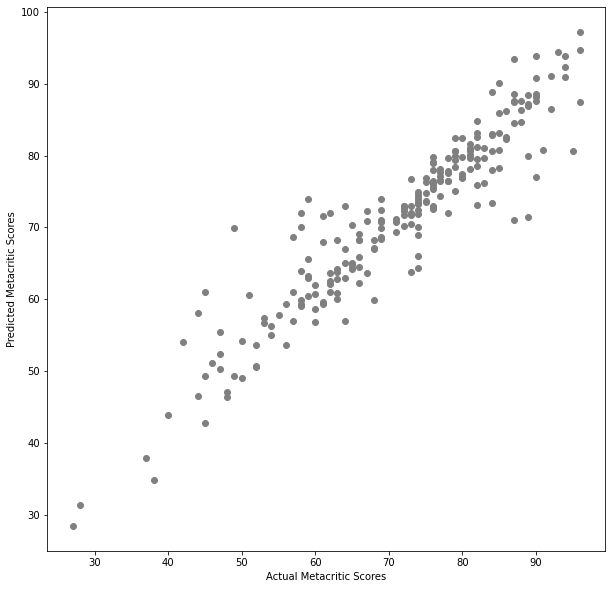

In [65]:
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, color='gray')

plt.xlabel("Actual Metacritic Scores")
plt.ylabel("Predicted Metacritic Scores");

Text(0, 0.5, 'Residuals')

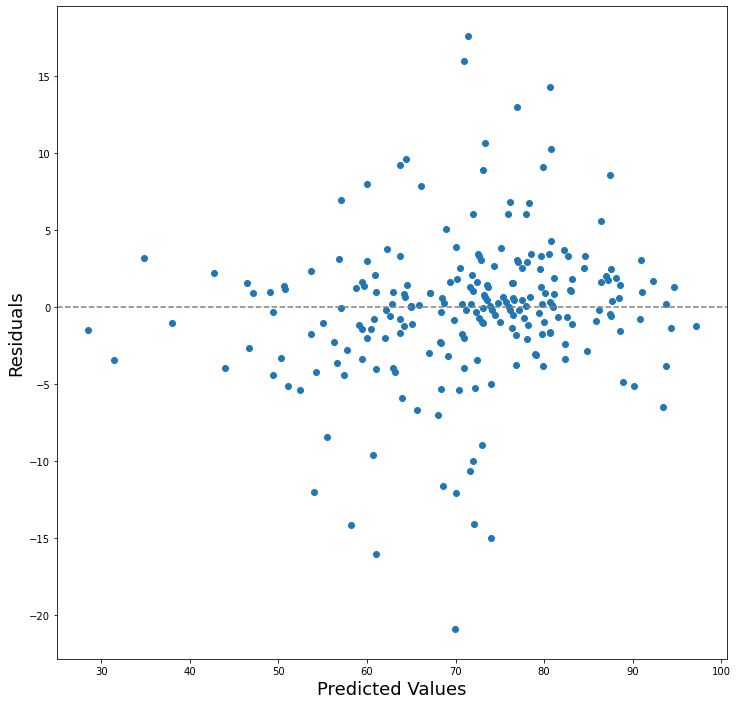

In [66]:
residuals = y_test - y_pred

plt.figure(figsize=(12,12))
plt.scatter(y_pred,residuals)

plt.axhline(0,linestyle="--",color='gray')
plt.xlabel('Predicted Values',fontsize=18)
plt.ylabel('Residuals',fontsize=18)

Text(0.5, 1.0, 'Normal Q-Q plot')

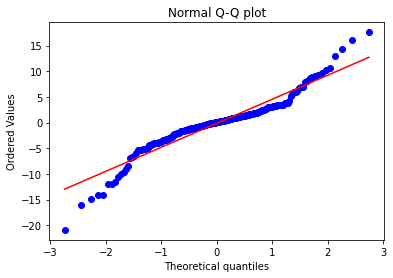

In [68]:
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

## Note
* After realizing in this model there was some data leakage I went back and refined the model which can be found in the Models_Final notebook